<a href="https://colab.research.google.com/github/path-0f-misantrope/most_uselles_musor2/blob/main/baselane2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [6]:
df = pd.read_csv("/content/train.csv")
df.info()
df.shape


<ipython-input-6-412c2cb385a2>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


(14456, 2666)

In [7]:
df.drop_duplicates()
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)
df = df.T.drop_duplicates().T




<Axes: >

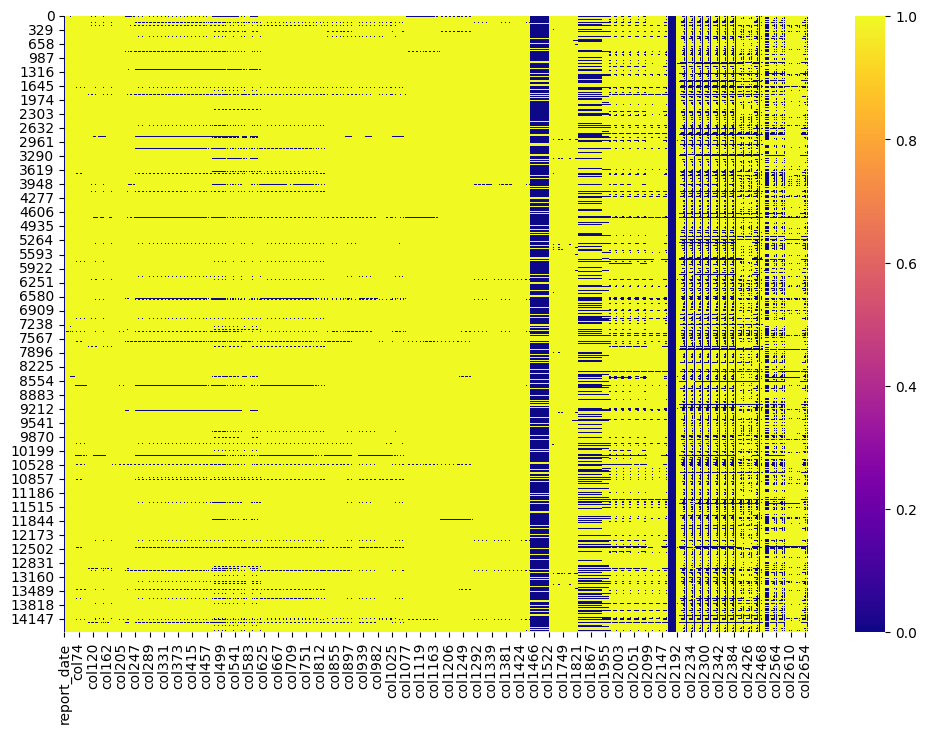

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='plasma')


In [9]:

# Заполнение медианой для всех числовых столбцов с пропусками
for col in df.select_dtypes(include=['float64', 'int64']):
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

threshold = 0.70 * len(df)  # Определяем пороговое значение
df_filtered = df.loc[:, df.notnull().sum() >= threshold]  # Фильтруем колонки
threshold_col = 0.20 * len(df.columns)  # Определяем пороговое значение
df_filtered = df[df.notnull().sum(axis=1) >= threshold_col] # Фильтруем строки


(1335, 2194)


<Axes: >

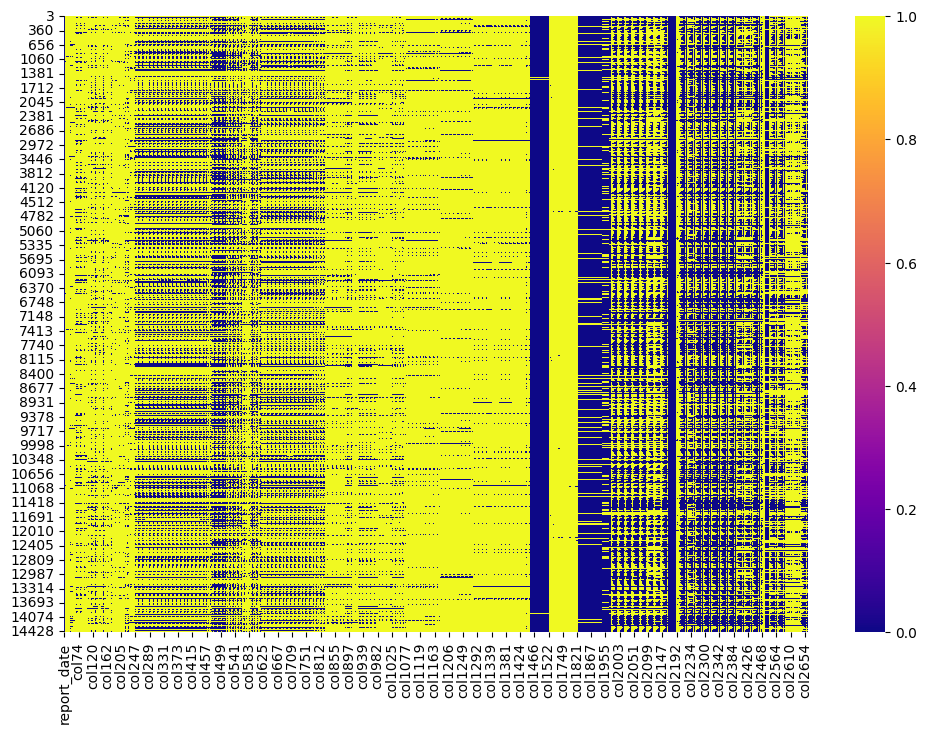

In [10]:

print(df_filtered.shape)
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.isnull(), cmap='plasma')

In [11]:
df_filtered.head(10)


,report_date,client_id,target,col1,col2,col3,col4,col7,col8,col27,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
11,2022-12-01,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5300000.0,5065000.0,5182500.0,NaN,NaN,NaN,5300000.0,5065000.0,5182500.0,0.258209
22,2022-10-01,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,0.257017
23,2022-12-01,34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,0.257698
35,2022-11-01,47,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6775538.0,6775538.0,6775538.0,NaN,NaN,NaN,6775538.0,6775538.0,6775538.0,0.25824
36,2023-01-01,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5780000.0,5780000.0,5780000.0,NaN,NaN,NaN,5780000.0,5780000.0,5780000.0,0.255107
39,2022-08-01,51,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
43,2023-02-01,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17780000.0,17780000.0,17780000.0,NaN,NaN,NaN,17780000.0,17780000.0,17780000.0,0.32008
66,2023-02-01,102,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7701000.0,7701000.0,7701000.0,NaN,NaN,NaN,7701000.0,7701000.0,7701000.0,0.271527


In [12]:
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()
df_filtered.fillna(0, inplace=True)
print(df_filtered[categorical_columns].dtypes)




<ipython-input-12-437258255b87>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)
<ipython-input-12-437258255b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


report_date     object
client_id        int64
target           int64
col1           float64
col2           float64
                ...   
col2659        float64
col2660        float64
col2661        float64
col2662        float64
col2663        float64
Length: 2194, dtype: object


In [13]:
df_filtered.drop(['col1454'], axis = 1, inplace = True) # там хэши какие то говно
df_filtered.drop(['report_date'], axis = 1, inplace = True) # удаляю дату потому что могу

<ipython-input-13-ab3a342d7444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['col1454'], axis = 1, inplace = True) # там хэши какие то говно
<ipython-input-13-ab3a342d7444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['report_date'], axis = 1, inplace = True) # удаляю дату потому что могу


In [17]:

categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()




In [15]:
df_filtered.drop([categorical_columns[4]], axis = 1, inplace = True)#сcылки удалил несколько меня число в этой строке
df_filtered.drop([categorical_columns[1]], axis = 1, inplace = True)


<ipython-input-15-1060570de0f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop([categorical_columns[4]], axis = 1, inplace = True)#сcылки удалил несколько меня число в этой строке
<ipython-input-15-1060570de0f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop([categorical_columns[1]], axis = 1, inplace = True)


In [18]:
df_filtered[categorical_columns] = df_filtered[categorical_columns].astype(str) #для кодировки катигориальных данных

<ipython-input-18-b1c7e888a6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categorical_columns] = df_filtered[categorical_columns].astype(str) #для кодировки катигориальных данных


In [19]:
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df_filtered[categorical_columns])
df_filtered[categorical_columns] = encoded_data.astype(int)

<ipython-input-19-0ea53c8cc290>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categorical_columns] = encoded_data.astype(int)


In [20]:
X = df_filtered.drop('target', axis=1)
y = df_filtered['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разделие на тестовую и обучающую выборку


In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_probs = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7269836462749848


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучаем модель с GridSearchCV
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры и лучший результат
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 15, 'n_estimators': 50}
Лучший результат: 0.9588126892194289


In [37]:
better_model = RandomForestClassifier(**grid_search.best_params_)
better_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)

print(f'AUC-ROC: {auc_roc}')
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

AUC-ROC: 0.7068443367655968
Точность: 0.951310861423221
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       254
           1       0.00      0.00      0.00        13

    accuracy                           0.95       267
   macro avg       0.48      0.50      0.49       267
weighted avg       0.90      0.95      0.93       267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


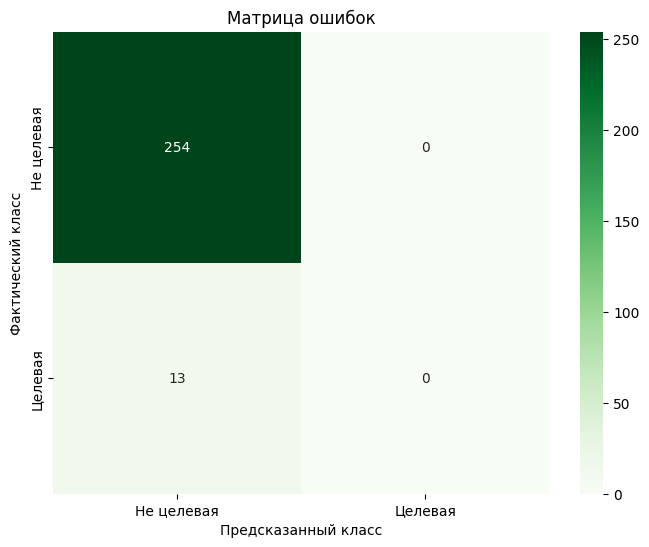

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Не целевая', 'Целевая'], yticklabels=['Не целевая', 'Целевая'])
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок')
plt.show()

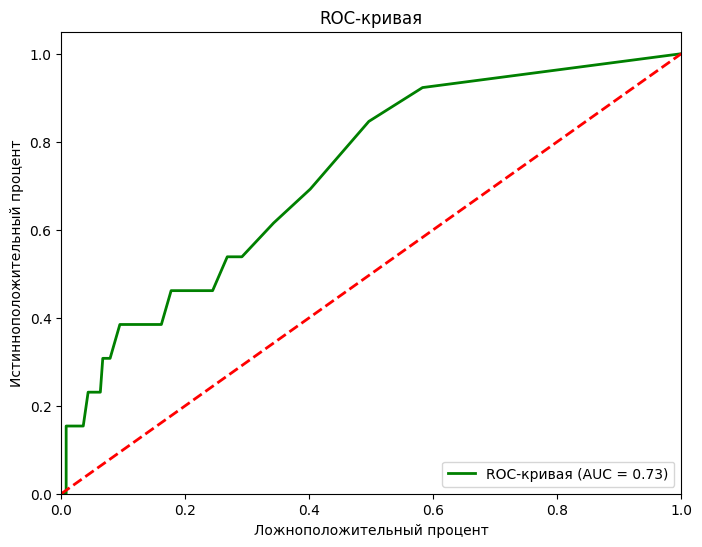

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный процент')
plt.ylabel('Истинноположительный процент')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Не оч вышло но лан
